# Results visualisation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gif

from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation, get_termination, get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.visualization.pcp import PCP
from pymoo.visualization.heatmap import Heatmap
from pymoo.visualization.petal import Petal
from pymoo.visualization.radar import Radar
from pymoo.visualization.radviz import Radviz
from pymoo.visualization.star_coordinate import StarCoordinate
from pymoo.util.plotting import plot
from sklearn.preprocessing import MinMaxScaler

## Problem and training definition

In [2]:
problem = get_problem("BNH")

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 40)

res = minimize(problem=problem,
               algorithm=algorithm,
               termination=termination)

The result object **res** holds the following values:
- **res.X**: design space values
- **res.F**: objective spaces values (for a multi-objective problem, this is the set of non-dominated solutions)
- **res.G**: constraint values
- **res.CV**: aggregated constraint violation
- **res.algorithm**: algorithm object
- **res.pop**: final population object
- **res.history**: history of algorithm object. (only if save_history has been enabled during the algorithm initialization)
- **res.time**: the time required to run the algorithm

# Result visualisation

## Objective Space
We have already seen how to plot the objective space. For some problems (such as those defined [here](https://www.pymoo.org/problems/index.html), the Pareto set and Pareto front are known. In this case, we can also plot them. 

In [3]:
ps = problem.pareto_set()
pf = problem.pareto_front()

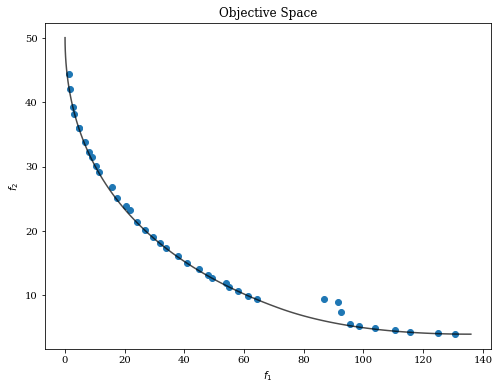

In [4]:
plot = Scatter(title="Objective Space")
plot.add(res.F)
plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.show();

## Design space

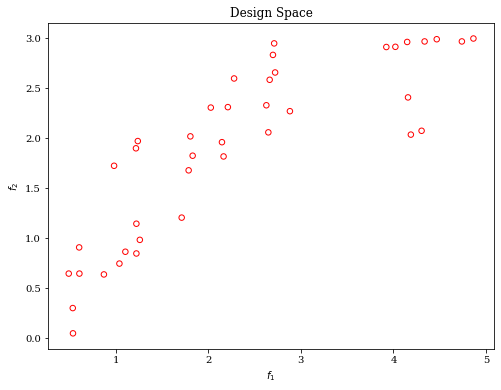

In [5]:
plot = Scatter(title="Design Space")
plot.add(res.X, s=30, facecolors='none', edgecolors='r')
plot.add(ps, plot_type="line", color="black", alpha=0.7) # doesn't work
plot.show();

## High dimensionality problems

If the problem has an design and/or objective space of dimensionality higher than 2, some other plotting options are possible. For example, "Carside" has 7 design variables and 3 objective variables.

In [6]:
problem = get_problem("Carside")

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 40)

res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=termination,
    seed=1,
    save_history=False,
    verbose=False)

## Pairwise pair plots

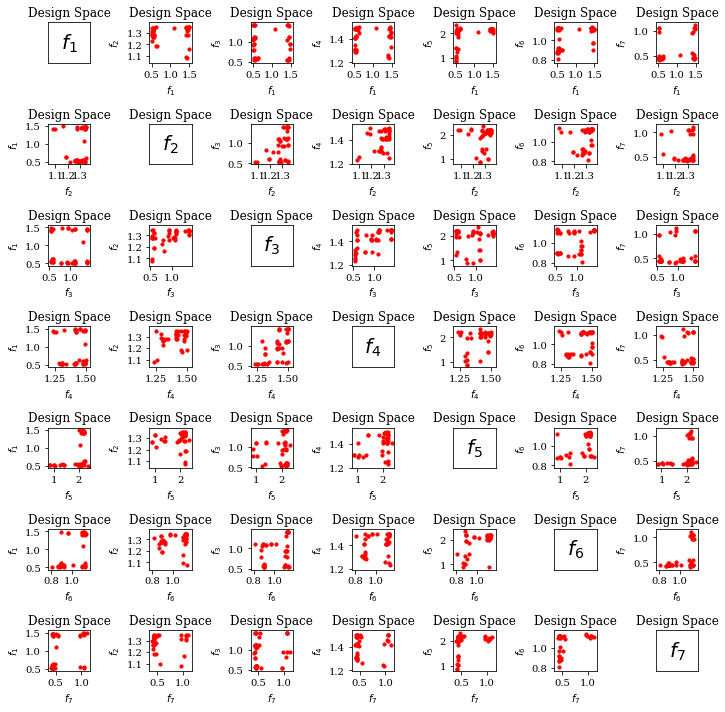

In [7]:
plot = Scatter(title="Design Space", figsize=(10, 10), tight_layout=True)
plot.add(res.X, s=10, color="r")
plot.show();

## 3D scatter plots

In [8]:
# First, scale the objectives between 0 and 1 (for clarity purposes)
scaler = MinMaxScaler()
norm_F = scaler.fit_transform(res.F)

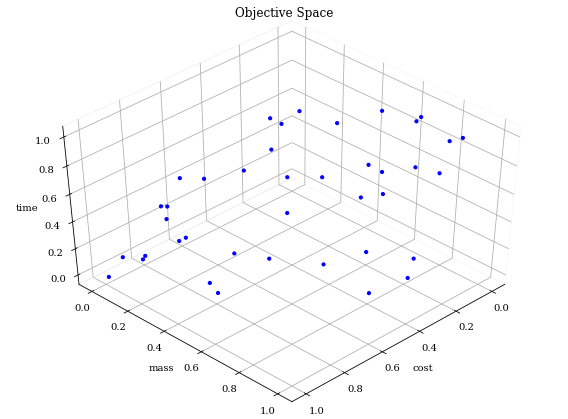

In [9]:
plot = Scatter(title=("Objective Space", {'pad': 30}),
               tight_layout=True,
               labels=["cost", "mass", "time"])

plot.add(norm_F, s=10, color="b")
plot.show();

## Parallel Coordinate Plots

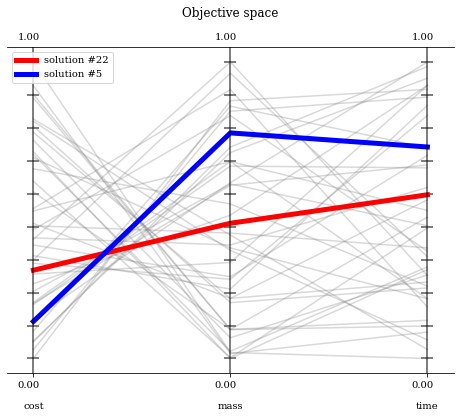

In [10]:
plot = PCP(title=("Objective space", {'pad': 30}),
           n_ticks=10,
           legend=(True, {'loc': "upper left"}),
           labels=["cost", "mass", "time"]
           )

plot.set_axis_style(color="black", alpha=0.5)
plot.add(norm_F, color="grey", alpha=0.3)
plot.add(norm_F[22], linewidth=5, color="r", label="solution #22")
plot.add(norm_F[5], linewidth=5, color="b", label="solution #5")
plot.show();

## Heatmaps

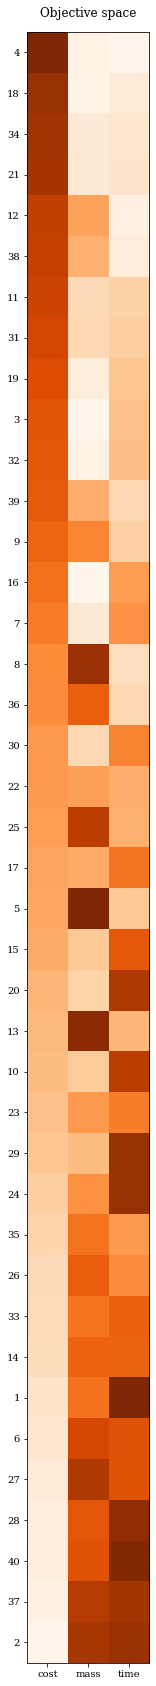

In [11]:
plot = Heatmap(title=("Objective space", {'pad': 15}),
               cmap="Oranges_r",
               labels=["cost", "mass", "time"],
               figsize=(10,30),
               order_by_objectives=0)

plot.add(norm_F)
plot.show();

## Petal plots

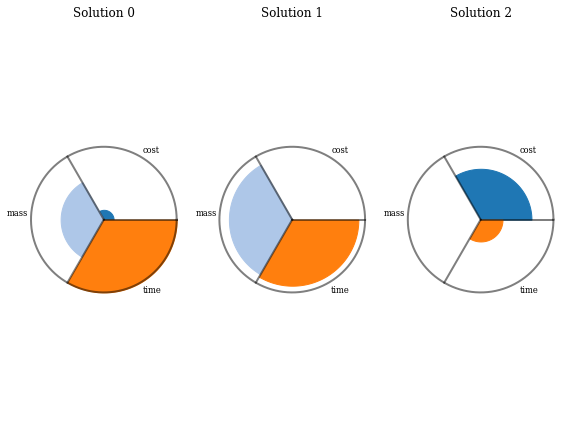

In [12]:
plot = Petal(bounds=[0, 1],
             cmap="tab20",
             labels=["cost", "mass", "time"],
             title=["Solution %s" % t for t in range(3)],
             tight_layout=True)

plot.add(norm_F[:3])  # plot the first 3 solutions
plot.show();

Note, for this kind of plots, scaling the objectives to unity is recommended.

# Radar plot

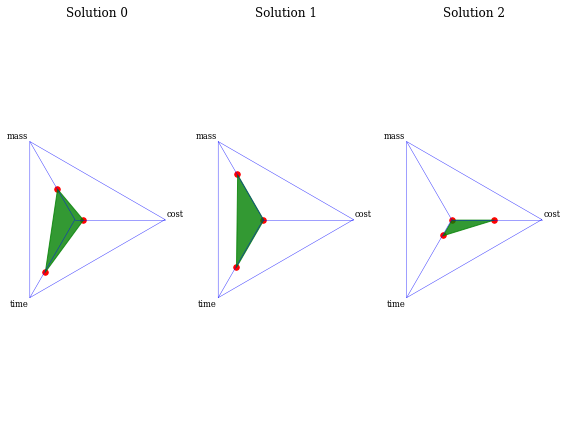

In [13]:
ideal_point = np.array([0, 0, 0])    # best possible solution
nadir_point = np.array([1.5, 1.5, 1.5]) # worst possible solution

plot = Radar(
    bounds=[ideal_point, nadir_point], 
    normalize_each_objective=True,
    point_style={"color": 'red', 's': 30},
    axis_style={"color": 'blue'},
    title=["Solution %s" % t for t in range(3)],
    tight_layout=True,
    labels=["cost", "mass", "time"])

plot.add(norm_F[:3], color="green", alpha=0.8)   # plot the first 3 values
plot.show();

## Radviz plot

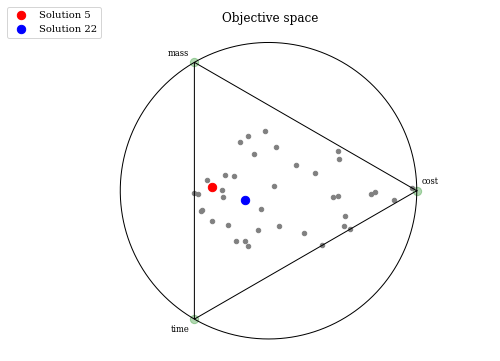

In [14]:
plot = Radviz(title="Objective space",
              legend=(True, {'loc': "upper left", 'bbox_to_anchor': (-0.1, 1.08, 0, 0)}),
              labels=["cost", "mass", "time"],
              endpoint_style={"s": 70, "color": "green"})

plot.set_axis_style(color="black", alpha=1.0)
plot.add(norm_F, color="grey", s=20)
plot.add(norm_F[5], color="red", s=70, label="Solution 5")
plot.add(norm_F[22], color="blue", s=70, label="Solution 22")
plot.show();

## Star coordinate plots

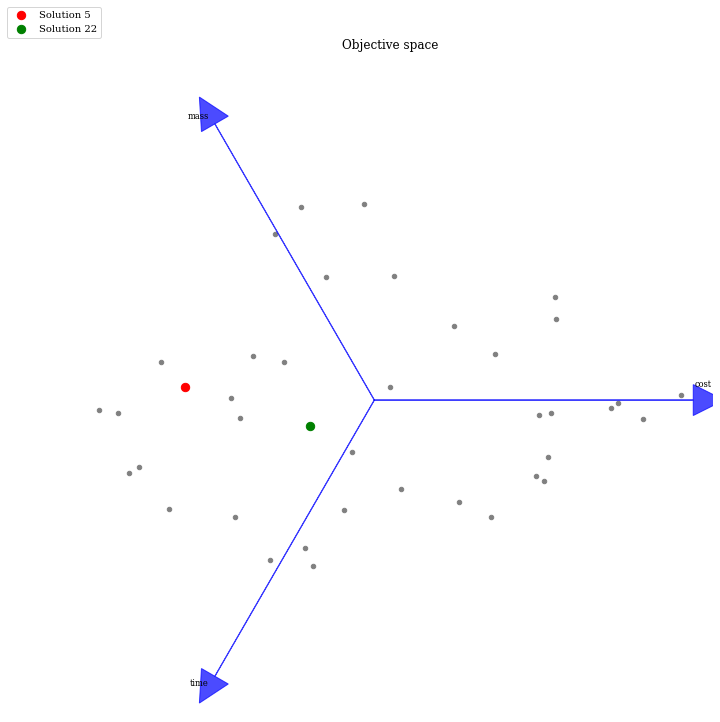

In [15]:
plot = StarCoordinate(title="Objective space",
                      legend=(True, {'loc': "upper left", 'bbox_to_anchor': (-0.1, 1.08, 0, 0)}),
                      labels=["cost", "mass", "time"],
                      axis_style={"color": "blue", 'alpha': 0.7},
                      arrow_style={"head_length": 0.1, "head_width": 0.1},
                      figsize=(10, 10), 
                      tight_layout=True)

plot.add(norm_F, color="grey", s=20)
plot.add(norm_F[5], color="red", s=70, label="Solution 5")
plot.add(norm_F[22], color="green", s=70, label="Solution 22")
plot.show();

## Animated Gif
We optimise the problem and save the history.

In [16]:
problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100, eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               termination=('n_gen', 100),
               seed=1,
               save_history=True,
               verbose=False)

We wrap the plot in a function and decorate it with gif.frame. (Note, for some reason, this doesn't work with PYMOO's Scatter function so I had to use a custom plot script with Matplotlib).

In [19]:
@gif.frame
def plot_gen(entry):
    X = entry.pop.get("F")
    pf = entry.problem.pareto_front()
    # best = entry.opt[0].F  # removed: doesn't make sense
    
    fig = plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'o', label="Current population")
    plt.plot(pf[:, 0], pf[:, 1], '-k', alpha=0.7, label="Pareto front")
    # plt.plot(best[0], best[1], 'xr', markersize=10, markeredgewidth=3, label="Best individual")

    plt.xlim(0, 1)
    plt.ylim(0, 6)
    plt.xlabel("Cost")
    plt.ylabel("Mass")
    plt.legend()

    plt.title(f"Generation #{entry.n_gen}")
    fig.tight_layout()

Loop over the generation in history.

In [20]:
gif.options.matplotlib['dpi'] = 100

frames = []

for entry in res.history:
    frame = plot_gen(entry)
    frames.append(frame)

gif.save(frames, "plots/objective_space.gif", duration=0.1, unit='s')

![gif_generation](plots/objective_space.gif)

We can also animate the design space in a gif. First, let's optimise a problem with a 2D design space (and save the history).

In [21]:
problem = get_problem("BNH")

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True)

termination = get_termination("n_gen", 40)

res = minimize(problem=problem,
               algorithm=algorithm,
               termination=termination,
               save_history=True)

In [22]:
@gif.frame
def plot_design_space(entry):
    X = entry.pop.get("X")
    
    fig = plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'x', label="Current population")

    plt.xlim(0, 5)
    plt.ylim(0, 3)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend(loc="lower right")

    plt.title(f"Generation #{entry.n_gen}")
    fig.tight_layout()

In [23]:
gif.options.matplotlib['dpi'] = 100

frames = []

for entry in res.history:
    frame = plot_design_space(entry)
    frames.append(frame)

gif.save(frames, "plots/design_space.gif", duration=0.1, unit='s')

![alt text](plots/design_space.gif)